In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_set=pd.read_csv("train .csv")
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_set=pd.read_csv("test .csv")
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
obj_attribute =train_set.select_dtypes(include='object')
obj_attribute.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [5]:
sample_submission=pd.read_csv("sample_submission.csv")
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


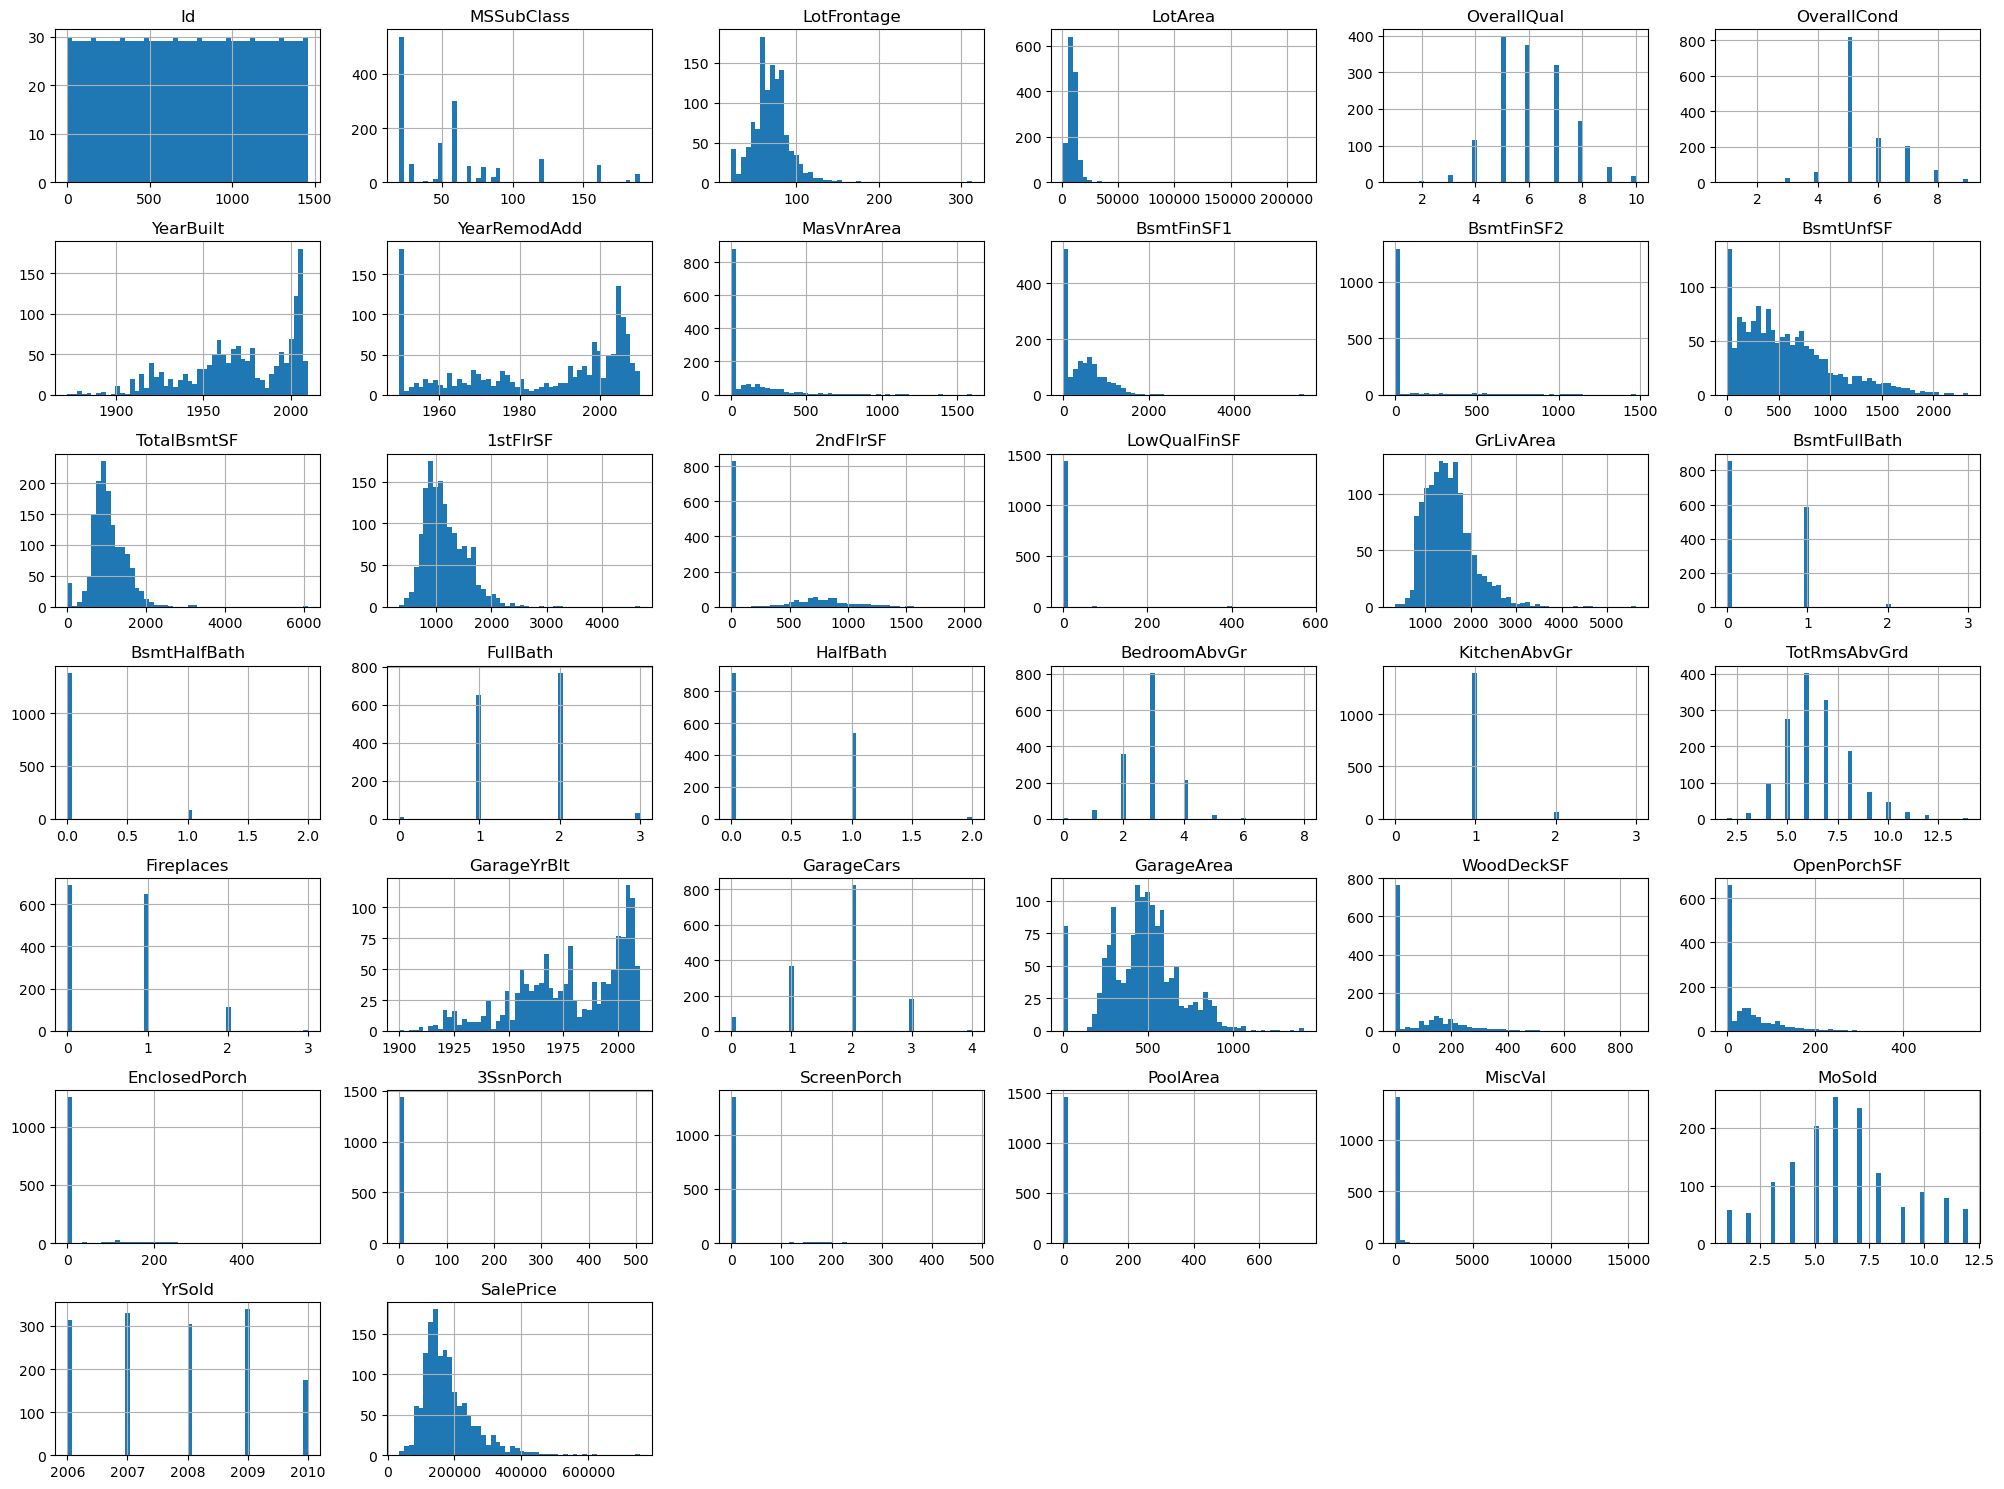

In [10]:
train_set.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [12]:
num_attributes = train_set.select_dtypes(include=['int64','float64'])
num_attributes.columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: >

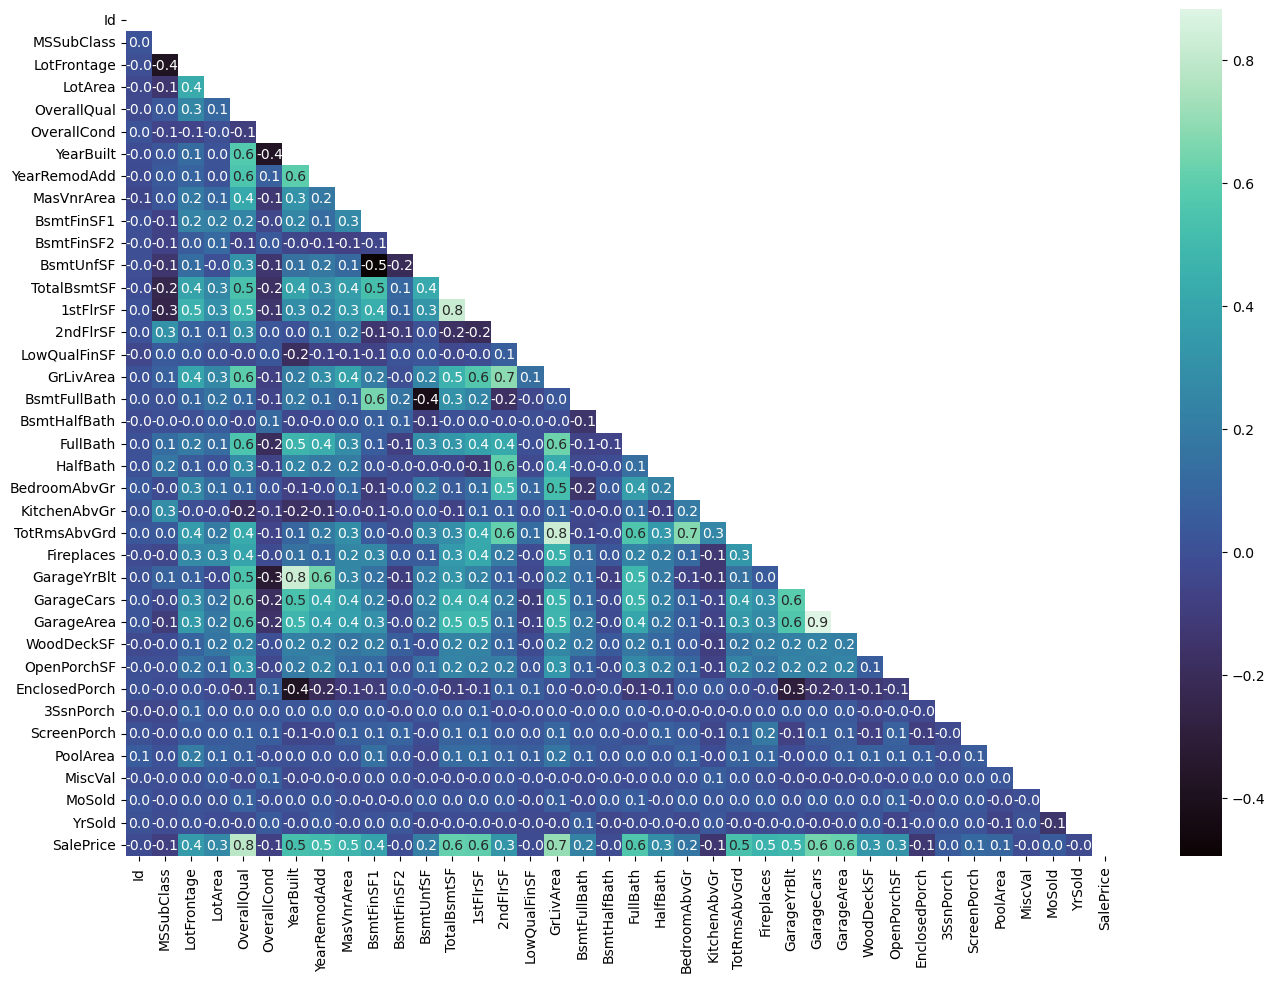

In [13]:
plt.figure(figsize=(16,11))

correlation_matrix=num_attributes.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True,
            mask=mask, cmap='mako',
            fmt='.1f', cbar=True)

In [15]:
y = train_set.SalePrice
X = train_set.drop(labels='SalePrice', axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc

KNeighborsClassifier()

In [21]:
from sklearn.impute import SimpleImputer
def missing_numerical(X_train):
    imputer = SimpleImputer(strategy="median") #a. creating imputer instance

    X_num = X_train.select_dtypes(include=['int64','float64']) #choosing num attributes
    imputer.fit(X_num) #b. fitting
    # It computed the mean of each attribute and stored the result in statistics_ instance variable

    X = imputer.transform(X_num) #c. transformed the data as per requirement and generated a plain np array
    train_X = pd.DataFrame(X, columns=X_num.columns)
    return train_X
train_X = missing_numerical(X_train)
val_X = missing_numerical(X_test)


In [22]:
from sklearn.preprocessing import OneHotEncoder
obj_encoder = OneHotEncoder() #a.making onehotencoder object
housing_1hot = obj_encoder.fit_transform(obj_attribute) #b.fitting and transforming in one go
housing_1hot

<1460x268 sparse matrix of type '<class 'numpy.float64'>'
	with 62780 stored elements in Compressed Sparse Row format>

In [24]:
imp_attributes = ['SalePrice','OverallQual', 'YearBuilt','YearRemodAdd', 'MasVnrArea','TotalBsmtSF','1stFlrSF',
                  'GrLivArea', 'FullBath','TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']



In [25]:
imp_attributes.remove('SalePrice')
train_X_imp = train_X[imp_attributes]
val_X_imp = val_X[imp_attributes]

In [30]:
dict_mse={}


In [31]:
from sklearn.metrics import mean_squared_error

def model_application(model, model_name, train_X, y_train, val_X, y_test):
    model.fit(train_X, y_train)

    predictions = model.predict(val_X)

    mse = mean_squared_error(y_test, predictions)
    dict_mse[model_name] = np.sqrt(mse)
    dict_mse[model_name]
    return model  #returning trained model


from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = model_application(lr_model, 'Linear Regression for important attributes', train_X_imp, y_train, val_X_imp, y_test)
lr_model_imp = LinearRegression()
lr_model = model_application(lr_model_imp, 'Linear Regression', train_X, y_train, val_X, y_test)


In [38]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg = model_application(forest_reg, 'Random Forest Regressor', train_X, y_train, val_X, y_test)
forest_reg_imp = RandomForestRegressor()
forest_reg_imp = model_application(forest_reg_imp, 'Random Forest Regressor for important attributes', train_X_imp, y_train, val_X_imp, y_test)

In [39]:
def display_scores(scores):
    print("Individual Error Scores:", scores)
    print("Mean error:", scores.mean())
    print("Standard deviation:", scores.std())


from sklearn.model_selection import cross_val_score

scores = cross_val_score( train_X, y_train,
                         scoring="neg_mean_squared_error", cv=10)
cv_rmse_scores = np.sqrt(-scores)

display_scores(cv_rmse_scores)

TypeError: estimator should be an estimator implementing 'fit' method,           Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0      619.0        20.0         90.0  11694.0          9.0          5.0   
1      871.0        20.0         60.0   6600.0          5.0          5.0   
2       93.0        30.0         80.0  13360.0          5.0          7.0   
3      818.0        20.0         69.0  13265.0          8.0          5.0   
4      303.0        20.0        118.0  13704.0          7.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1163   764.0        60.0         82.0   9430.0          8.0          5.0   
1164   836.0        20.0         60.0   9600.0          4.0          7.0   
1165  1217.0        90.0         68.0   8930.0          6.0          5.0   
1166   560.0       120.0         69.0   3196.0          7.0          5.0   
1167   685.0        60.0         58.0  16770.0          7.0          5.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0        2007.0        2007.0       452.0        48.0  ...       774.0   
1        1962.0        1962.0         0.0         0.0  ...       308.0   
2        1921.0        2006.0         0.0       713.0  ...       432.0   
3        2002.0        2002.0       148.0      1218.0  ...       857.0   
4        2001.0        2002.0       150.0         0.0  ...       843.0   
...         ...           ...         ...         ...  ...         ...   
1163     1999.0        1999.0       673.0      1163.0  ...       856.0   
1164     1950.0        1995.0         0.0       442.0  ...       436.0   
1165     1978.0        1978.0         0.0         0.0  ...       539.0   
1166     2003.0        2004.0        18.0         0.0  ...       420.0   
1167     1998.0        1998.0        30.0         0.0  ...       486.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0            0.0        108.0            0.0        0.0        260.0   
1            0.0          0.0            0.0        0.0          0.0   
2            0.0          0.0           44.0        0.0          0.0   
3          150.0         59.0            0.0        0.0          0.0   
4          468.0         81.0            0.0        0.0          0.0   
...          ...          ...            ...        ...          ...   
1163         0.0        128.0            0.0        0.0        180.0   
1164       290.0          0.0            0.0        0.0          0.0   
1165         0.0          0.0            0.0        0.0          0.0   
1166       143.0         20.0            0.0        0.0          0.0   
1167         0.0         81.0            0.0        0.0          0.0   

      PoolArea  MiscVal  MoSold  YrSold  
0          0.0      0.0     7.0  2007.0  
1          0.0      0.0     8.0  2009.0  
2          0.0      0.0     8.0  2009.0  
3          0.0      0.0     7.0  2008.0  
4          0.0      0.0     1.0  2006.0  
...        ...      ...     ...     ...  
1163       0.0      0.0     7.0  2009.0  
1164       0.0      0.0     2.0  2010.0  
1165       0.0      0.0     4.0  2010.0  
1166       0.0      0.0    10.0  2006.0  
1167       0.0      0.0     6.0  2010.0  

[1168 rows x 37 columns] was passed

In [41]:
test_X = missing_numerical(test_set) #dealing with numerical missing values
test_X_imp = test_X[imp_attributes]

my_result = forest_reg.predict(test_X) #predicting

# Saving the result into submission file
submission = pd.read_csv('sample_submission.csv')
submission["SalePrice"] = my_result
submission.to_csv('submission.csv', index=False)